#### **Overview**


* Built an app that estimates Internship stipends on the basis of personalized factors for each individual user with inputs ranging widely from location, skills, perks, duration, etc.
* Scraped over 15000+ internships from Internshala.com using web scraper written on Python.
* Cleaned and manipulated the entire data extensively on Python to make it usable.
* Engineered new features and performed deep exploration on the data.
* Performed various pre-modelling statistical tests to understand the data better.
* Built a machine learning model with the best hyper-parameters.
* Built a client facing API using flask from scratch and deployed the app online for anyone to use.

#### **Potential Users**

* Students interested in knowing the benefits and the amount of stipend they should expect when applying for internships.
* Companies / Organizations / Firms while deciding how much they should offer as stipend when issuing new internship positions.


##### **Problem Case**

The main idea behind the project came from when I was searching for internships online. I realized that there was no practical way to get an estimate for the stipend one should expect based on the skills the person has when looking for internships. 
I also realized that there are many other factors like location, internship duration, perks the user wants, flexibility of work, etc. that could play a role in deciding the stipend amount.

*But what got me really curious was the question that do these factors really play a role in deciding a stipend amount?*

*If yes, can we build a machine learning model around it that can estimate the stipend amount for an end user?*

##### **Initial Exploration**

When searching through online websites, I found many estimates from all around the world but none provided a personalized estimation for each individual.

Glassdoor.com Internship Estimation
![Glassdoor.com Internship Estimation](https://github.com/rishi5565/internshala-stipend-estimator/raw/main/EDA%20Images/glassdoorest.png)
 

The information I found was generally vague and varied widely when compared across other similar internships that were on offer in the market.


##### **Data Search & Collection**

I proceeded to search for datasets on Indian internship markets that could provide me the raw information I needed to extract information from and explore further. But I couldn’t find any useful data whatsoever.
Hence, I decided to collect the data myself from Internshala.com, which is one of the largest internship search platforms in India by writing a web scraper program on Python.

But with a quick google search, I found that someone had already written a web scraper application for Internshala.com two years ago.
[GitHub Link](https://github.com/het-parekh/Internshala-Web-Scraper-Internshala.com)
(The owner can be contacted on [hetparekh26@gmail.com](mailto:hetparekh26@gmail.com) for any inquiries.)

The code was outdated and was not working as expected due to changes in the website over the years. But with some modifications, tweaking and debugging, I was able to make the code work successfully. After running the scraper overnight, we got the dataset with the following features:

* Title
* Company
* Location
* Duration
* Stipend
* Apply By
* Applicants
* Skills Required
* Perks
* Number of Openings
* Link

Next, we import the necessary libraries and load our raw dataset.

In [184]:
# imported necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [185]:
# set the figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})

In [186]:
# imported our functions
import sys
sys.path.append("Functions/")
import functions as func

In [187]:
# we import in our dataset
df = pd.read_excel("internshala_scraped_raw.xls")
df.head(3)

,Title,Company,Location,Duration,Stipend,Apply By,Applicants,Skills Required,Perks,Number of Openings,Link
0,Fundraising,Tare Zameen Foundation,Work From Home,1 Month,1000 /month + Incentives,18 Feb' 22,390 applicants,NaN,"Certificate , Letter of recommendation , Flexi...",200.0,https://internshala.com/internship/detail/fund...
1,Business Development,Internshala,Gurgaon,6 Months,20000 /month,22 Feb' 22,346 applicants,"MS-Office ,","Certificate , Informal dress code , 5 days a w...",2.0,https://internshala.com/internship/detail/busi...
2,Campus Ambassador,International Model United Nations,Work From Home,1 Month,Performance Based,2 Mar' 22,654 applicants,NaN,"Certificate , Letter of recommendation , Flexi...",3000.0,https://internshala.com/internship/detail/camp...


We call our univariate stats function to get an initial overview of our dataset but we see that we are unable to explore the data in detail due to various missing values and incompatible data types.

In [188]:
func.univarstats(df)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Number of Openings,float64,True,15109,11,38,2.0,6.529089,1.0,1.0,2.0,4.0,5000.0,81.266796,43.679245,2268.32485
Duration,object,False,15120,0,16,3 Months,-,-,-,-,-,-,-,-,-
Apply By,object,False,15120,0,38,23 Feb' 22,-,-,-,-,-,-,-,-,-
Perks,object,False,14207,913,120,"Certificate , Letter of recommendation , Flexi...",-,-,-,-,-,-,-,-,-
Location,object,False,15120,0,204,Work From Home,-,-,-,-,-,-,-,-,-
Stipend,object,False,15120,0,444,5000 /month,-,-,-,-,-,-,-,-,-
Applicants,object,False,15120,0,458,Be an early applicant,-,-,-,-,-,-,-,-,-
Title,object,False,15120,0,2342,Business Development (Sales),-,-,-,-,-,-,-,-,-
Skills Required,object,False,11638,3482,5054,"English Proficiency (Spoken) , English Profici...",-,-,-,-,-,-,-,-,-
Company,object,False,15120,0,8480,Relinns Technologies,-,-,-,-,-,-,-,-,-


### **Data Cleaning**

##### Stipend & Duration
For our case, we decided to begin cleaning the dataset starting with our target variable, i.e., Stipend and alongside Duration. 
We see that there are two categories in the column. One is paid and another is unpaid and performance based. But since the aim of our project is to perform analysis and build model around estimating stipend amount, we decided to filter out unpaid stipend internships as it doesn’t serve a purpose in this project.


Also, we saw that unpaid internships constituted only 4.3% (653 observations out of 15120 total observations) of our entire dataset.

In [189]:
percent_value = (len(df[((df.Stipend == "Unpaid") | (df.Stipend == "Performance Based"))]) / (len(df)))
print("Unpaid Internships constitution out of total:", round(percent_value*100, 1), "percent")

Unpaid Internships constitution out of total: 4.3 percent


In [190]:
# filtered out unpaid or performance based internships
df = df[~((df.Stipend == "Unpaid") | (df.Stipend == "Performance Based"))]

Next, we proceeded to feature engineer a new feature “Incentives” if it is being provided alongside with stipend. 

**(It would be interesting to see if providing incentives as an extra had any affect on the amount of stipend being offered.)**

In [191]:
# added an incentives column (1 if incentives)
df["Incentives"] = df["Stipend"].apply(lambda x: 1 if "Incentives" in x else 0)

In [192]:
# removed incentives from stipend
df["Stipend"] = df["Stipend"].str.replace("  Incentives", "")

We also see that there is a wide range of different types of values in stipend and duration, from range of values to monthly to weekly to per design basis, and also some corrupted data. We will clean all that up, perform conversions as and when necessary and parse only the stipend per month numeric amount and duration in number of months.

In [193]:
# dropped 6 rows with corrupted data
df[df.Stipend == "Not provided"].index
df.drop(df[df.Stipend == "Not provided"].index, axis=0, inplace=True)

In [194]:
# added separate column for lumpsum amount to do calculations of per month
df["Lumpsum"] = df["Stipend"].apply(lambda x: x.split("lump sum")[0] if "lump sum" in x else 0)
# removed word lump sum from stipend
df["Stipend"] = df["Stipend"].str.replace("lump sum", "")
# added separate column for weekly amount to do calculation of per month
df["Weekly"] = df["Stipend"].apply(lambda x: x.split("/week")[0] if "/week" in x else 0)
# removed word week from stipend
df["Stipend"] = df["Stipend"].str.replace("/week","")

In [195]:
# dropped 2 rows with inconsistent data
df[df.Stipend.str.contains("Design")]
df.drop(df[df.Stipend.str.contains("Design")].index, axis=0, inplace=True)

In [196]:
# removed the word month from stipend
df["Stipend"] = df["Stipend"].str.replace("/month", "")
# removed the symbol "+" from stipend
df["Stipend"] = df["Stipend"].str.replace("+", "")
# striped blank spaces from stipend to do calculations w/o exceptions
df["Stipend"] = df["Stipend"].str.strip()
# averaged the stipend for ranged values
df["Stipend"] = df["Stipend"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in x else x)

In [197]:
# dropped 1 row with corrupted data
df.drop(df[df.Duration.str.contains("Not Provided")].index, axis=0, inplace=True)

In [198]:
# made duration monthly column to store conversions in month for further calculations
df["Duration in Month"] = df["Duration"].apply(lambda x: x.split(" ")[0] if "Month" in x else float(x.split(" ")[0].strip()) / 4.345)
# averaged ranged lumpsum values
df["Lumpsum"] = df["Lumpsum"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in str(x) else x)
# converted to float for ease in calculations
df["Duration in Month"] = df["Duration in Month"].astype("float")
df["Lumpsum"] = df["Lumpsum"].astype("float")
# divided lumpsum by monthly duration to get monthly amount
df["Lumpsum to monthly"] = (df["Lumpsum"]) / (df["Duration in Month"])
# averaged ranged weekly values
df["Weekly"] = df["Weekly"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in str(x) else x)
# converted to float for ease in further calculations
df["Weekly"] = df["Weekly"].astype("float")
# converted weekly amount to monthly
df["Weekly to monthly"] = df["Weekly"] * 4.345

In [199]:
# converted stipend to float for ease in calculations
df["Stipend"] = df["Stipend"].astype("float")

# calculated and converted to monthly stipend amount and storing back to stipend column
df["Stipend monthly"] = df.apply(lambda x: x["Stipend"] if x["Lumpsum to monthly"] == 0 else x["Lumpsum to monthly"], axis=1)
df["Stipend monthly2"] = df.apply(lambda x: x["Stipend monthly"] if x["Weekly to monthly"] == 0 else x["Weekly to monthly"], axis=1)
df["Stipend"] = df["Stipend monthly2"]

Stipend Distribution

Skewness =  2.09 , Right Skewed
Kurtosis =  13.57 , Leptokurtic


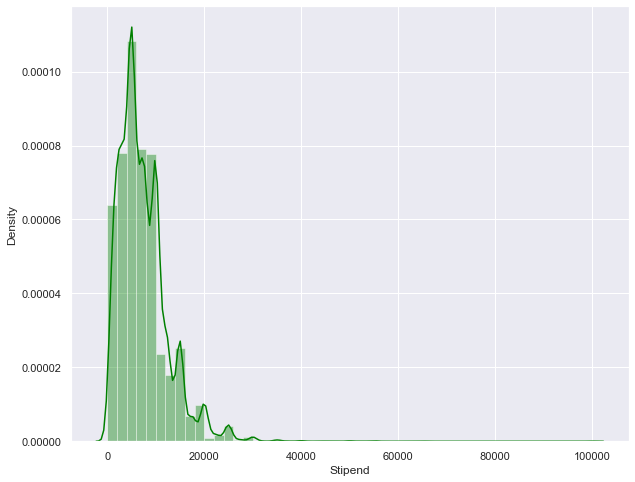

In [200]:
# we check the distribution and skewness of stipend
sns.distplot(df["Stipend"], color= "green");
print("Skewness = ", round(df.Stipend.skew(), 2), ", Right Skewed")
print("Kurtosis = ", round(df.Stipend.kurt(), 2), ", Leptokurtic")

In [201]:
# storing back converted to monthly duration back to duration column
df.Duration = df["Duration in Month"]

Duration Distribution

Skewness =  3.38 , Right Skewed
Kurtosis =  49.82 , Leptokurtic


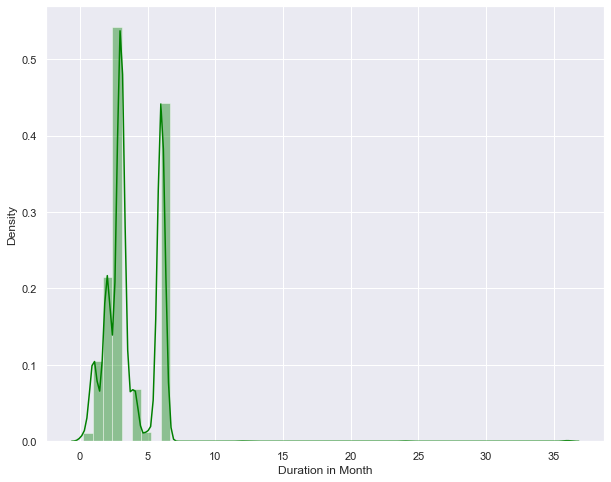

In [202]:
# we check the distribution and skewness of duration
sns.distplot(df["Duration in Month"], color= "green");
print("Skewness = ", round(df["Duration in Month"].skew(), 2), ", Right Skewed")
print("Kurtosis = ", round(df["Duration in Month"].kurt(), 2), ", Leptokurtic")

In [203]:
# dropped all irrelevant columns made above
df.drop(['Duration in Month', 'Lumpsum to monthly', 'Weekly to monthly', 'Stipend monthly', 
        'Stipend monthly2', 'Lumpsum', 'Weekly', 'Link', 'Apply By'], axis=1, inplace=True)

In [204]:
# we call our univariate stats function to get an overview of our dataset
func.univarstats(df)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Number of Openings,float64,True,14454,4,27,2.0,3.672063,1.0,1.0,2.0,4.0,300.0,5.309905,20.466837,933.699816
Duration,float64,True,14458,0,15,3.0,3.723026,0.23015,3.0,3.0,6.0,36.0,1.934034,3.379229,49.82327
Incentives,int64,True,14458,0,2,0,0.088809,0,0.0,0.0,0.0,1,0.284478,2.89125,6.360204
Stipend,float64,True,14458,0,203,5000.0,7405.712764,5.0,4000.0,6000.0,10000.0,100000.0,5165.484471,2.087127,13.568873
Perks,object,False,13558,900,120,"Certificate , Letter of recommendation , Flexi...",-,-,-,-,-,-,-,-,-
Location,object,False,14458,0,204,Work From Home,-,-,-,-,-,-,-,-,-
Applicants,object,False,14458,0,451,Be an early applicant,-,-,-,-,-,-,-,-,-
Title,object,False,14458,0,2237,Business Development (Sales),-,-,-,-,-,-,-,-,-
Skills Required,object,False,11248,3210,4949,"English Proficiency (Spoken) , English Profici...",-,-,-,-,-,-,-,-,-
Company,object,False,14458,0,8239,Relinns Technologies,-,-,-,-,-,-,-,-,-


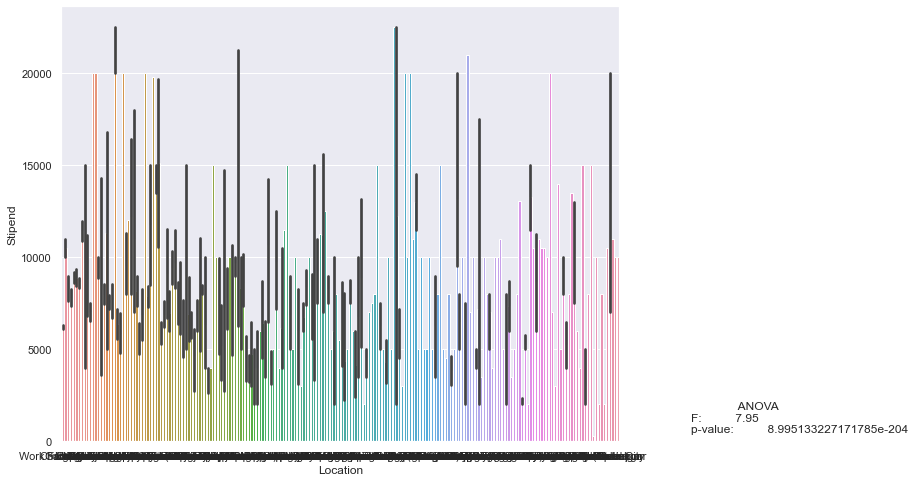

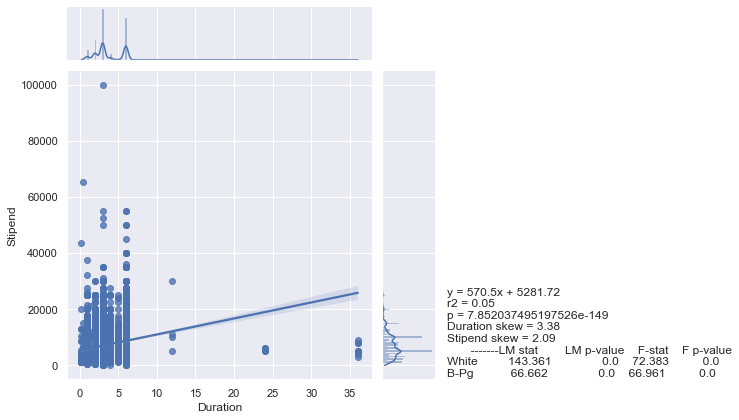

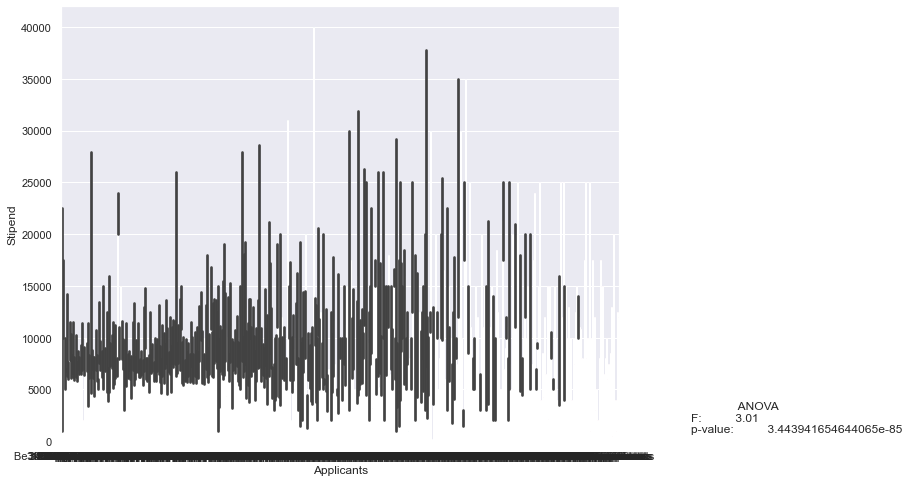

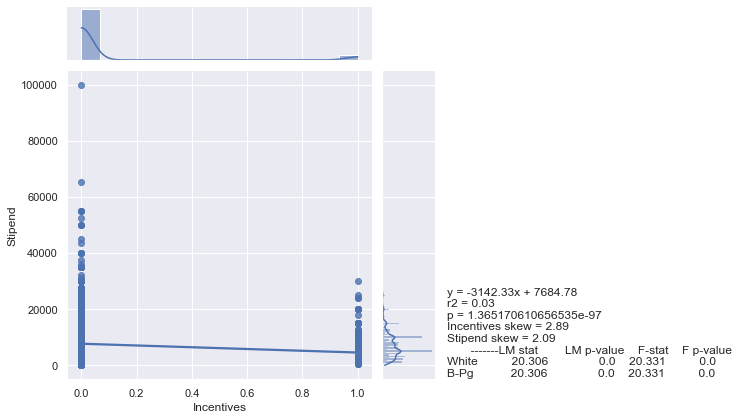

,Stat,+/-,Effect Size,p-value
Duration,r,Positive(+),0.214,7.852037e-149
Incentives,r,Negative(-),0.173,1.365171e-97
Location,F,,7.947,8.995133e-204
Applicants,F,,3.006,3.443942e-85
Perks,NaN,NaN,NaN,NaN
Number of Openings,NaN,NaN,NaN,NaN


In [205]:
# we call our bivariate stats function to get an overview of all the pairwise relationships in our dataset
func.bivarstats(df[['Location', 'Duration', 'Stipend', 'Applicants', 'Perks', 'Number of Openings', 'Incentives']], "Stipend")

##### Location

Here, we see that there are many locations that has very few occurrences (2 or less). We expect that these locations are less popular and should not exhibit a significant difference when predicting stipend.
So, we decide to perform a hypothesis test to verify if they are significant when predicting stipend.

**Null Hypothesis (H0)** : *All locations with 2 or less occurrences do not exhibit a significant difference when predicting stipend.*

**Alternate Hypothesis (HA)** : *All locations with 2 or less occurrences do exhibit a significant difference when predicting stipend.*

We get the following result after performing One-Way ANOVA test:

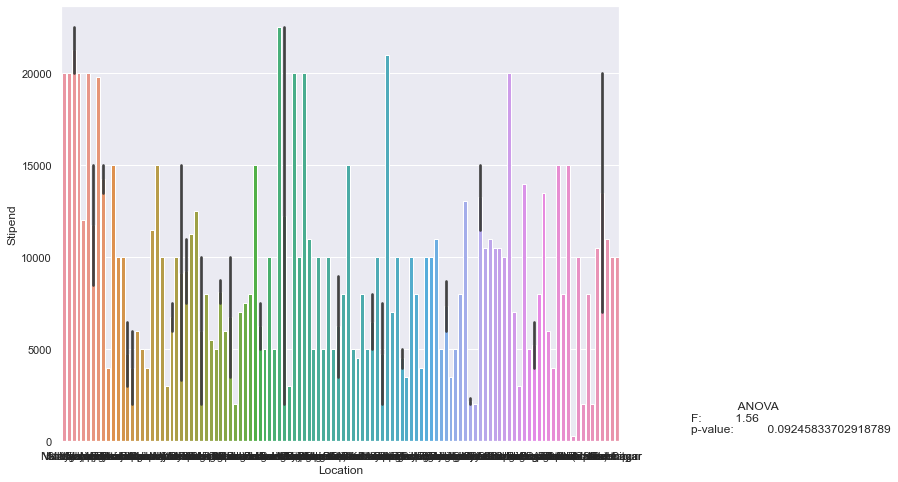

,Stat,+/-,Effect Size,p-value
Location,F,,1.557,0.092458


In [206]:
# we check for significance of locations with 2 or less occurrences in predicting stipend
loc_vc = pd.DataFrame(df.Location.value_counts())
loc_vc = loc_vc[loc_vc <= 2].dropna(axis=0)
loc_ot_df = df[df.Location.isin(loc_vc.index)]
func.bivarstats(loc_ot_df[['Location', 'Stipend']], "Stipend")

Since, we find that p-value (0.092) > 0.05,

We fail to reject the Null Hypothesis (H0).

Hence, we conclude that these locations can be grouped under a single category “Other” for our further analysis as they are statistically insignificant.

In [207]:
# Changed all locations(2 or less occurrences) to "Other" category as they will be insignificant for our prediction model
loc_vc = pd.DataFrame(df.Location.value_counts())
loc_vc = loc_vc[loc_vc <= 2].dropna(axis=0)
loc_rem_list = list(loc_vc.index)
otherlist = []
for i in range(1,len(loc_rem_list)+1):
    otherlist.append("Other")
reploc_dict = dict(zip(loc_rem_list, otherlist))
df.Location.replace(reploc_dict, inplace=True)

##### Title

Here, we see that there are many titles that has very few occurrences (2 or less). We expect that these titles should not exhibit a significant difference when predicting stipend.
So, we decide to perform a hypothesis test to verify if they are significant when predicting stipend.

**Null Hypothesis (H0)** : *All titles with 2 or less occurrences do not exhibit a significant difference when predicting stipend.*

**Alternate Hypothesis (HA)** : *All titles with 2 or less occurrences do exhibit a significant difference when predicting stipend.*

We get the following result after performing One-Way ANOVA test:

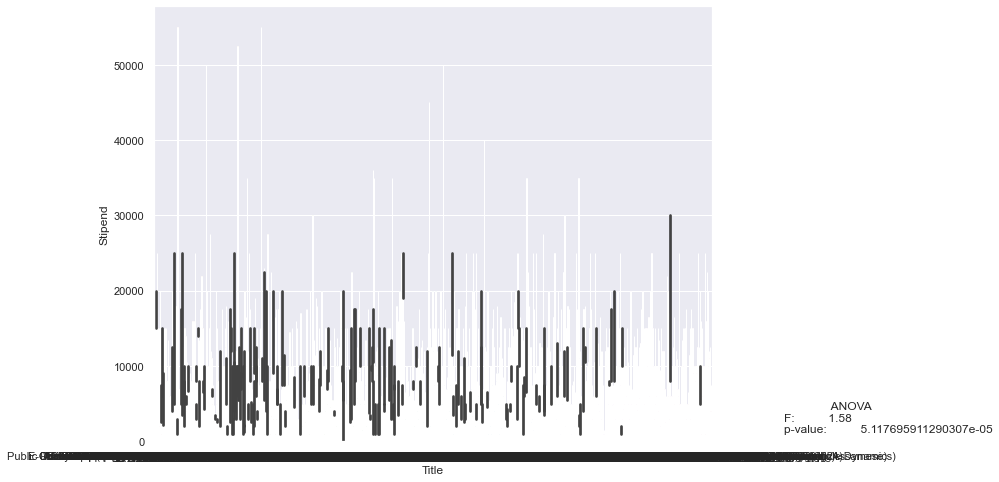

,Stat,+/-,Effect Size,p-value
Title,F,,1.579,0.000051


In [208]:
# we check for significance of titles with 2 or less occurrences in predicting stipend
tt_vc = pd.DataFrame(df.Title.value_counts())
tt_vc = tt_vc[tt_vc <= 2].dropna(axis=0)
tt_ot_df = df[df.Title.isin(tt_vc.index)]
func.bivarstats(tt_ot_df[['Title', 'Stipend']], "Stipend")

Since, we find p-value (0.000051) < 0.05,

We reject the Null Hypothesis (H0).

Hence, we conclude that these titles cannot be grouped together as they are statistically significant.

We clean the data further by renaming some same terms with different names.

In [209]:
# we replace some same terms with different names to improve consistency
df.Title = df.Title.apply(lambda x: "Sales" if "sales" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Accounting" if "account" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Java Development" if "js" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Android Developer" if "android" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Electrical Engineering" if "elect" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Flutter Development" if "flutter" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Photography" if "phot" in x.lower() else x)

We also perform a hypothesis with a t-test that "Marketing" and "Sales" in title feature are similar and their effect is not significantly different on the target variable.

We get the following result after performing the t-test:

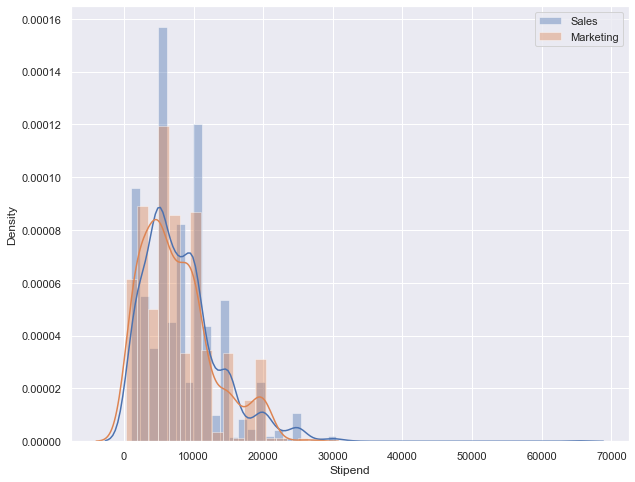

Ttest_indResult(statistic=2.540346139756761, pvalue=0.011136860178341427)

In [210]:
# we test a hypothesis for "Marketing" and "Sales" in Title column are similar and that they dont have significant effect on target variable
from scipy.stats import ttest_ind
sns.distplot(df[df.Title == "Sales"]["Stipend"], label="Sales")
sns.distplot(df[df.Title == "Marketing"]["Stipend"], label="Marketing")
plt.legend()
plt.show()
ttest_ind(df[df.Title == "Sales"]["Stipend"], df[df.Title == "Marketing"]["Stipend"])

With a p-value of < 0.05, we conclude that there is a statistically significant difference and we cannot rename them with a similar term.

##### Applicants

We perform a t-test for a hypothesis that having “Be an early applicant” in applicants feature is no different than not having it.

**Null Hypothesis (H0)** : *There is a no significant difference between having “Be an early applicant” in applicants feature and not having it.*

**Alternate Hypothesis (HA)** : *There is a significant difference in having “Be an early applicant” in applicants feature and not having it.*

We get the following result after performing the t-test:


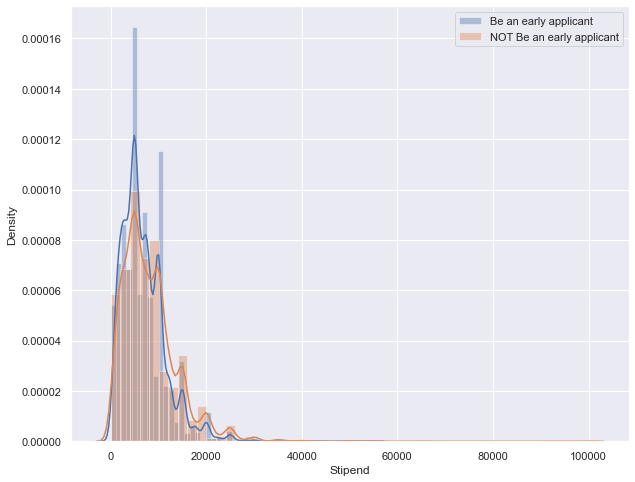

Ttest_indResult(statistic=-15.531627638313225, pvalue=5.78153221676758e-54)

In [211]:
# we test a hypothesis for if "Be an early applicant" is significant in our Applicants column:
sns.distplot(df[df.Applicants == "Be an early applicant"]["Stipend"], label="Be an early applicant")
sns.distplot(df[df.Applicants != "Be an early applicant"]["Stipend"], label="NOT Be an early applicant")
plt.legend()
plt.show()
ttest_ind(df[df.Applicants == "Be an early applicant"]["Stipend"], df[df.Applicants != "Be an early applicant"]["Stipend"])

Since, we find p-value < 0.05,

We reject the Null Hypothesis (H0).

We conclude that there is a statistically significant difference between having and not having “Be an early applicant” in applicants feature.

Then we create multiple bins and check for significance with One Way ANOVA test.

In [212]:
# parsed the numeric values
df.Applicants = df.Applicants.apply(lambda x: x.split(" ")[0])
df.Applicants.replace("Be", "Early Application Phase", inplace=True)

In [213]:
# created separate column for conversion
df["Applicants1"] = df.Applicants.apply(lambda x: x if x.isnumeric() == True else 0)
df.Applicants1 = df.Applicants1.astype("int")

In [214]:
# created a function to create bins of 250
def bin_func(x):
    if ((x > 0) & (x <= 250)):
        return "0-250"
    elif ((x > 250) & (x <= 500)):
        return "250-500"
    elif ((x > 500) & (x <= 750)):
        return "500-750"
    elif ((x > 750) & (x <= 1000)):
        return "750-1000"
    else:
        return "0"

In [215]:
# passed the function
df["Applicants2"] = df.Applicants1.apply(bin_func)

In [216]:
# restored bins back to original column
df["Applicants"] = df.apply(lambda x: x["Applicants"] if x["Applicants2"] == "0" else x["Applicants2"], axis=1)
df.drop(columns=["Applicants1", "Applicants2"], inplace=True)

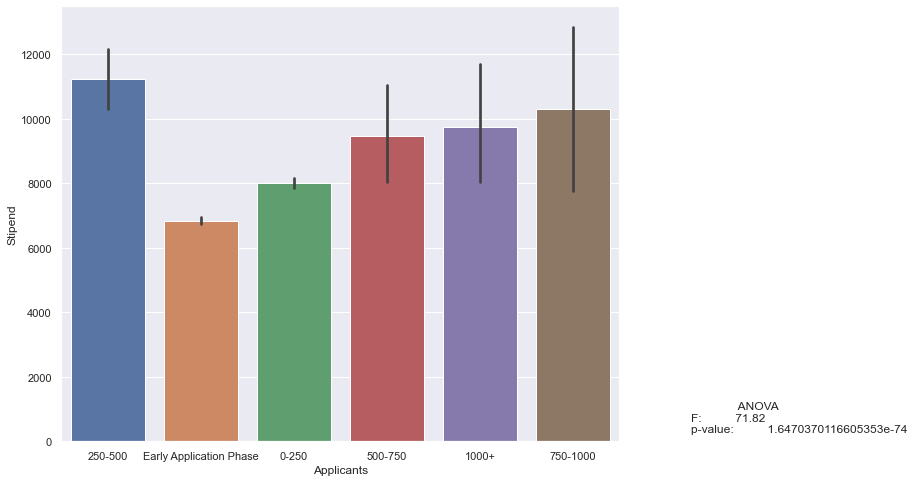

,Stat,+/-,Effect Size,p-value
Applicants,F,,71.824,1.647037e-74


In [217]:
# we check for significance with F-test
func.bivarstats(df[['Applicants', 'Stipend']], "Stipend")

We see that the groupings are statistically significant. We also perform a Tukey's HSD (honestly significant difference) test between each pair to confirm the significance.

In [218]:
# we run a tukey hsd test
import statsmodels.stats.multicomp as multi 
mc = multi.MultiComparison(df['Stipend'], df['Applicants'])
Results = mc.tukeyhsd()
print(Results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
 group1           group2          meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------------------------
   0-250                   1000+  1745.6515  0.384  -832.8274  4324.1305  False
   0-250                 250-500  3238.8373    0.0  2340.6879  4136.9867   True
   0-250                 500-750  1470.2579 0.3151  -575.6073   3516.123  False
   0-250                750-1000  2284.5204 0.2654  -754.4824  5323.5233  False
   0-250 Early Application Phase -1163.9479    0.0 -1413.9653  -913.9305   True
   1000+                 250-500  1493.1858 0.6208 -1223.5188  4209.8904  False
   1000+                 500-750  -275.3937 0.9999 -3555.5424  3004.7551  False
   1000+                750-1000   538.8689 0.9989 -3437.2285  4514.9662  False
   1000+ Early Application Phase -2909.5994 0.0163 -5485.7051  -333.4938   True
 250-500                 500-750 -1768.5

##### Skills Required

For Skills Required feature, we can see a lot of missing information along with varieties of skill combinations each separated with a comma.
We will replace the missing values with “Not Specific” based on the assumption that there are no specific requirements of particular skills.


In [219]:
# filled null values in skills required
df["Skills Required"].fillna("Not Specific , ", axis=0, inplace=True)
# created list with all specific skills for each row
df["Skills Required"] = df["Skills Required"].apply(lambda x: x.split(" , ")[:-1])

We explore the overall total counts of all specific skills required from the lists we created above from each observation.

In [220]:
from collections import Counter
import operator

s_list = []
for i in df["Skills Required"]:
    s_list += i

skill_cnt = dict(Counter(s_list))
skill_cnt_dict = dict(sorted(skill_cnt.items(), key=operator.itemgetter(1),reverse=True))
skill_count_df = pd.DataFrame(skill_cnt_dict.items(), columns=['Skill', 'Count'])
skill_count_df

,Skill,Count
0,English Proficiency (Written),3910
1,English Proficiency (Spoken),3843
2,Not Specific,3210
3,Social Media Marketing,2137
4,Digital Marketing,2082
...,...,...
378,PLC SCADA,1
379,OrCAD,1
380,Urdu Proficiency(Written),1
381,InterPlanetary File System,1


##### Perks

Here, again we can see a lot of missing information along with varieties of perk combinations each separated with a comma.
We will replace the missing values with “NA” based on the assumption that no perks are being provided.

In [221]:
# filled null values in perks
df["Perks"].fillna("NA , ", axis=0, inplace=True)
# created list with all specific perks for each row
df["Perks"] = df["Perks"].apply(lambda x: x.split(" , ")[:-1])

We explore the overall total counts of all specific perks from the lists we created above from each observation.

In [222]:
p_list = []
for i in df["Perks"]:
    p_list += i

perk_cnt = dict(Counter(p_list))
perk_cnt_dict = dict(sorted(perk_cnt.items(), key=operator.itemgetter(1),reverse=True))
perk_count_df = pd.DataFrame(perk_cnt_dict.items(), columns=['Perk', 'Count'])
perk_count_df

,Perk,Count
0,Certificate,12377
1,Letter of recommendation,9891
2,Flexible work hours,7383
3,5 days a week,4441
4,Informal dress code,3184
5,Job offer,3102
6,Free snacks & beverages,1404
7,NA,900


##### Number of Openings

We don’t see many discrepancies here other than 4 missing values. We fill them with the mean and proceed further.


In [223]:
# we fill nulls in "Number of Openings" column with its mean
df["Number of Openings"].fillna(df["Number of Openings"].mean(), inplace=True)

### **Exploratory Data Analysis (EDA)**
We will be trying to explore our data from various angles to find all interesting points of interest.

We create a horizontal bar graph to visually explore the top 15 most required skills for internship positions.

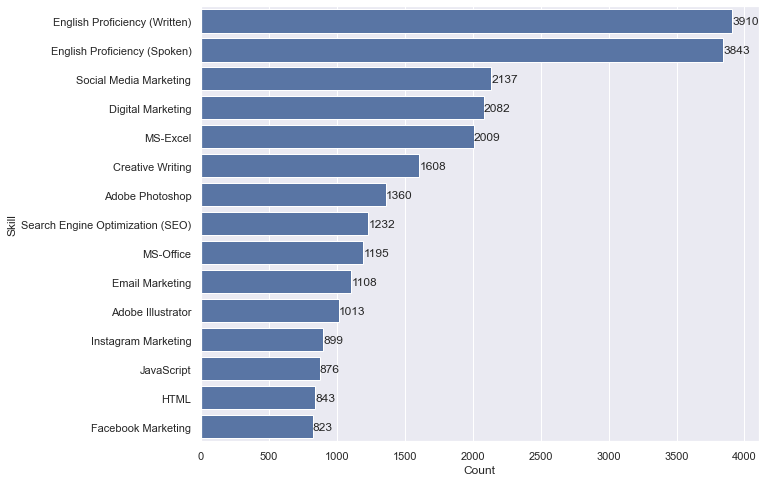

In [224]:
ax = sns.barplot(x="Count", y="Skill", data=skill_count_df[skill_count_df["Skill"] != "Not Specific"][0:15],label="Total", color="b");
abs_values = skill_count_df[skill_count_df["Skill"] != "Not Specific"][0:15]["Count"].value_counts(ascending=False).index
ax.bar_label(container=ax.containers[0], labels=abs_values);

We create a horizontal bar graph to visually explore the type of perks most offered in internship positions.

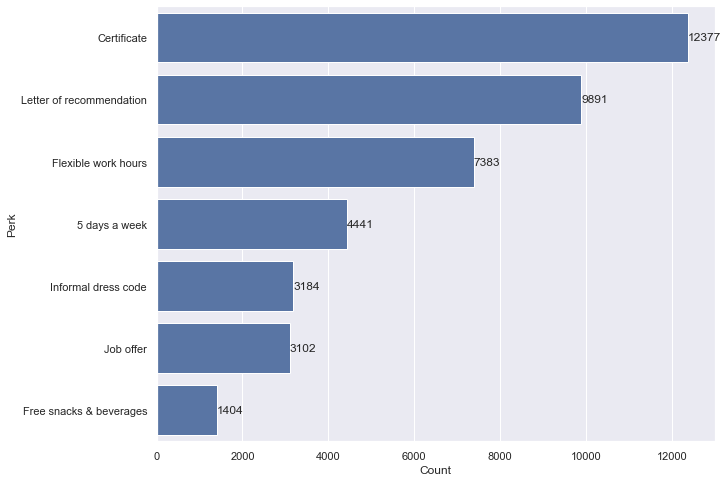

In [225]:
ax = sns.barplot(x="Count", y="Perk", data=perk_count_df[perk_count_df["Perk"] != "NA"],label="Total", color="b")
abs_values = perk_count_df[perk_count_df["Perk"] != "NA"]["Count"].value_counts(ascending=False).index
ax.bar_label(container=ax.containers[0], labels=abs_values);

We create a horizontal bar graph to visually explore the top 15 hiring companies.

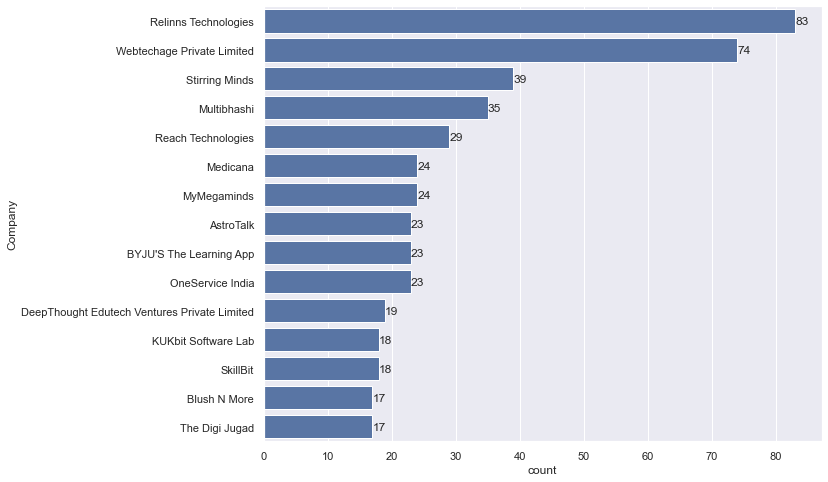

In [226]:
ax = sns.countplot(y=df['Company'], order=df['Company'].value_counts(ascending=False).iloc[:15].index, color="b")
abs_values = df['Company'].value_counts(ascending=False).iloc[:15].values
ax.bar_label(container=ax.containers[0], labels=abs_values);

We create a horizontal bar graph to visually explore the top 15 most required titles for internship positions.

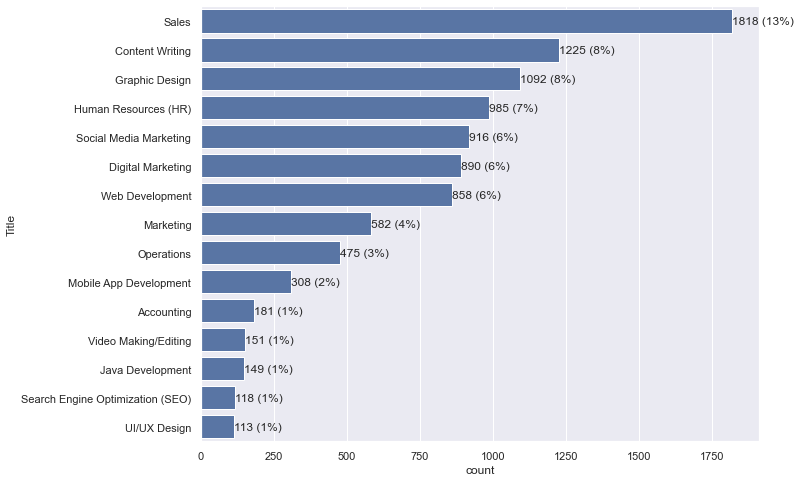

In [227]:
ax = sns.countplot(y="Title", data=df, order=df.Title.value_counts(ascending=False).iloc[:15].index, color="b")
abs_values = df['Title'].value_counts(ascending=False).iloc[:15]
rel_values = df['Title'].value_counts(ascending=False, normalize=True).iloc[:15].values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

We create a horizontal bar graph to visually explore the top 15 locations offering most in-office internships.

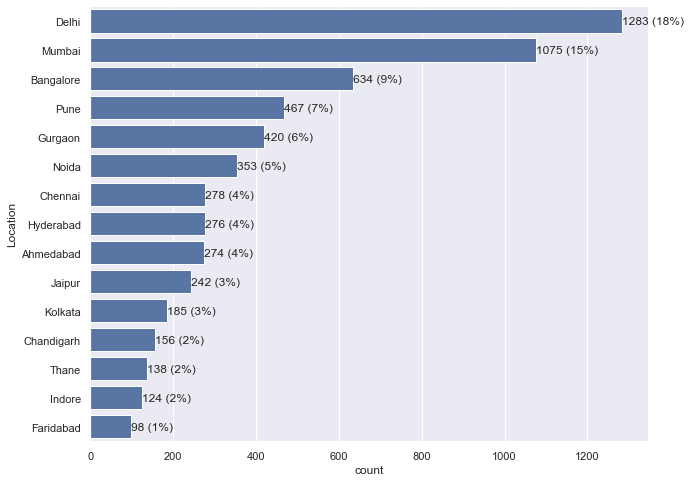

In [228]:
locmaskdf = df[(df["Location"] != "Work From Home") & (df["Location"] != "Other")]
ax = sns.countplot(y="Location", data=locmaskdf, order=locmaskdf.Location.value_counts(ascending=False).iloc[:15].index, color="b")
abs_values = locmaskdf['Location'].value_counts(ascending=False).iloc[:15]
rel_values = locmaskdf['Location'].value_counts(ascending=False, normalize=True).iloc[:15].values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

Next, we also explore the ratio of in-office internships to Work from Home internships.

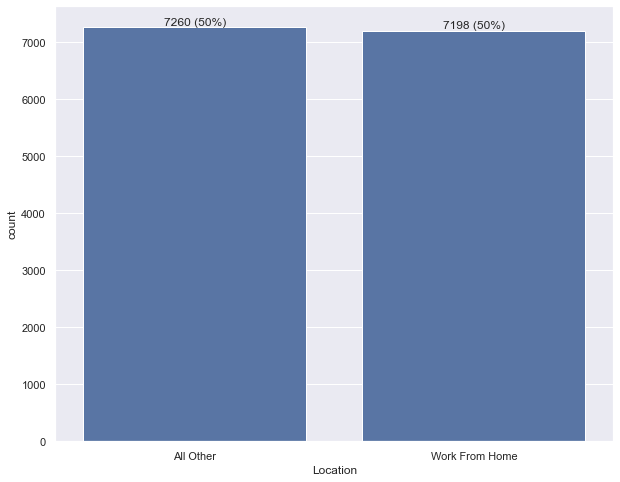

In [229]:
dfwfh = df.copy()
notwfhmask = dfwfh[dfwfh["Location"] != "Work From Home"]["Location"].index
dfwfh.loc[notwfhmask, "Location"] = "All Other"
ax = sns.countplot(x="Location", data=dfwfh, order=dfwfh.Location.value_counts(ascending=False).index, color="b")
abs_values = dfwfh['Location'].value_counts(ascending=False)
rel_values = dfwfh['Location'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

We see that the ratio is almost 1:1.

##### Duration – Stipend Relationship

We explore the relationship between Duration and our Target Variable Stipend with a scatter plot.

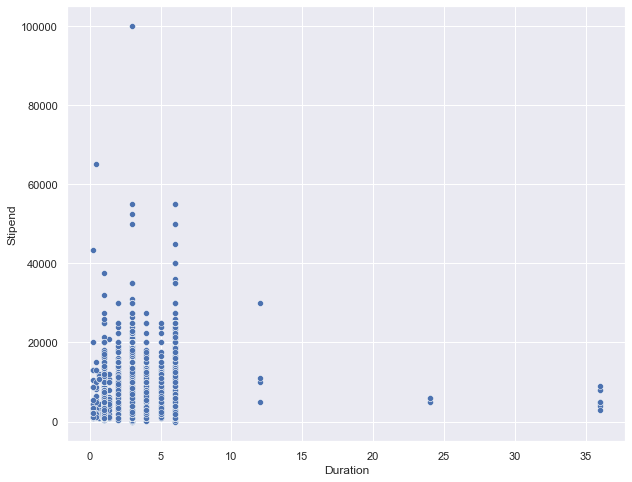

In [230]:
# we create a scatter plot to explore the relationship between Duration and our Target Variable Stipend
sns.scatterplot("Duration", "Stipend", data=df);

We see that the plot is ineligible to read as the data is stacked together so we remove the outliers and plot a kernel density estimate (KDE) plot for better visual interpretation.

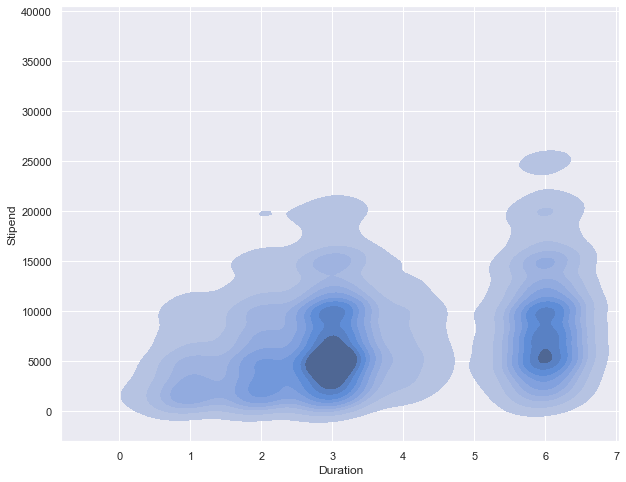

In [231]:
# we create a kde plot after filtering outliers for better interpretation
sns.kdeplot(data=df[(df["Stipend"] < 40000) & (df["Duration"] < 10)],x="Duration", y="Stipend", fill=True);

Here, we can see that majority of our data is centred in and around Duration of 3 months and Stipend of 5000. Some density can also be seen centred at around Duration of 6 months and Stipend of 5000.

##### Number of Openings – Stipend Relationship

We explore the relationship between Number of Openings and our Target Variable Stipend with a scatter plot.

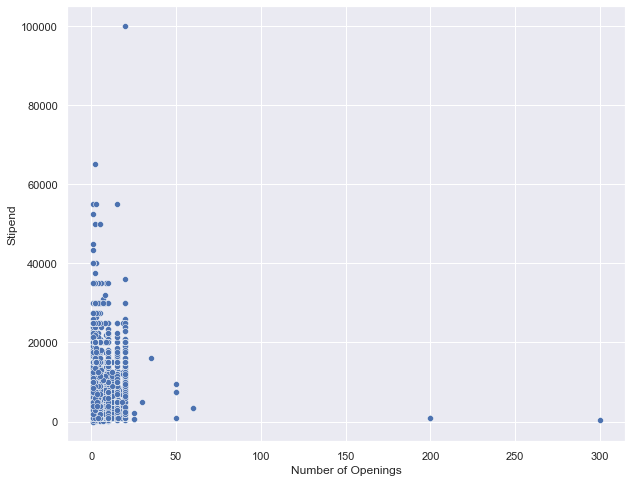

In [232]:
# we create a scatter plot to explore the relationship between Number of Openings and our Target Variable Stipend
sns.scatterplot("Number of Openings", "Stipend", data=df);

Again, we see that the plot is ineligible to read as the data is stacked together so we remove the outliers and plot a kernel density estimate (KDE) plot for better visual interpretation.

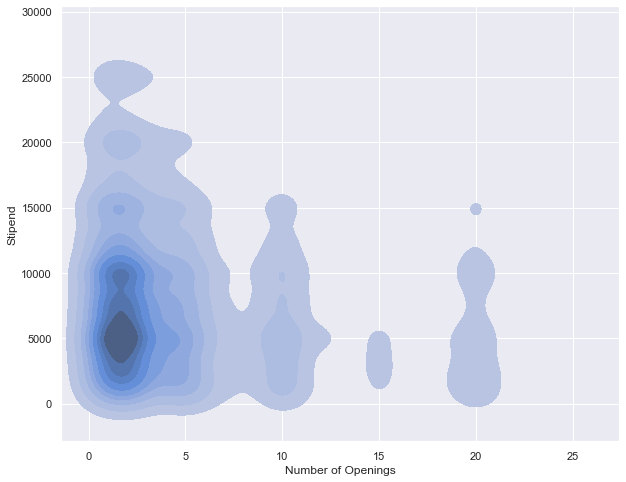

In [233]:
# we create a kde plot after filtering outliers for better interpretation
sns.kdeplot(data=df[(df["Stipend"] < 30000) & (df["Number of Openings"] < 27)],x="Number of Openings", y="Stipend", fill=True);

Here, we can see that majority of our data is centred in and around Number of Openings of 0 to 5 and Stipend of 5000.

### **Target Variable Transformation**

From above, we can see that our target variable Stipend has the following properties:
Skewness: 2.09, Right Skewed
Kurtosis: 13.57, Leptokurtic

We first remove the outliers of Stipend greater than 25000 and less than 1000 as seen in the scatter plot above and then check the distribution with Skewness and Kurtosis again. 

In [234]:
# we remove some outliers as seen from above scatter plot
df.drop(df[(df.Stipend > 15000) | (df.Stipend < 1000)].index, axis=0, inplace=True)

Skewness =  0.49
Kurtosis =  -0.53


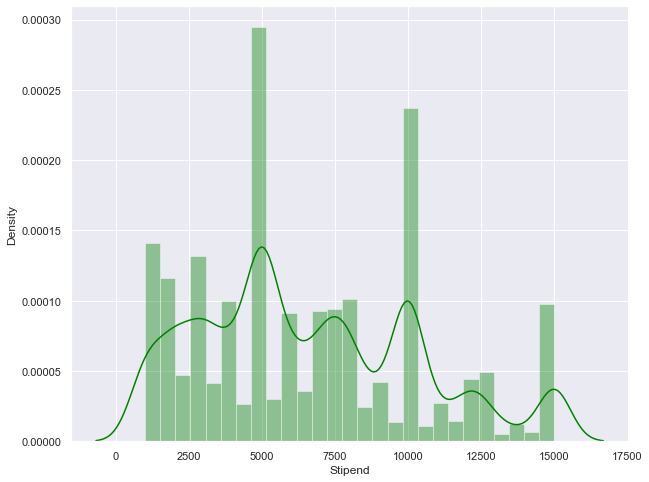

In [235]:
# we check the distribution with skewness and kurtosis
sns.distplot(df["Stipend"], color= "green");
print("Skewness = ", round(df.Stipend.skew(), 2))
print("Kurtosis = ", round(df.Stipend.kurt(), 2))

We see that our skewness has reduced to 0.49.

Next, we will try several transformations to try to normalise our target variable further and assess the results.

##### Log Transformation

Skewness Before Transformation =  0.49 
Skewness After Transformation =  -0.77


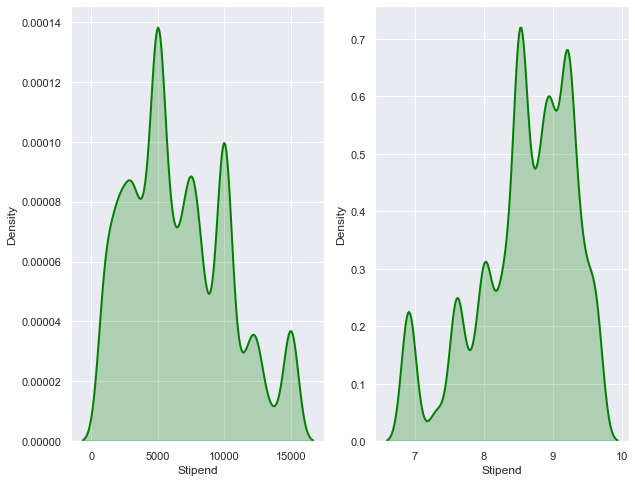

In [236]:
# we perform log transformation and check for skewness
fig, ax = plt.subplots(1, 2)
sns.distplot(df["Stipend"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])
  
sns.distplot(np.log(df["Stipend"]), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])
  
print("Skewness Before Transformation = ", round(df.Stipend.skew(), 2), "\nSkewness After Transformation = ", round(np.log(df["Stipend"]).skew(), 2))
plt.show()

##### Box-Cox Transformation

Skewness Before Transformation =  0.49 
Skewness After Transformation =  -0.09


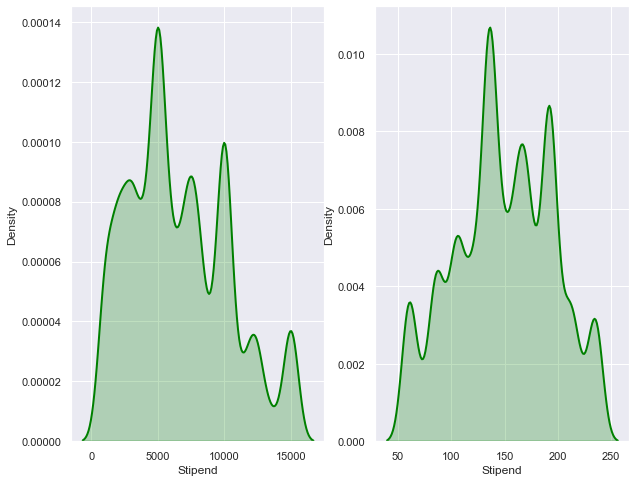

In [237]:
# we perform boxcox transformation and check for skewness
from scipy import stats
from scipy.special import boxcox, inv_boxcox
fit, lmda = stats.boxcox(df["Stipend"])

fig, ax = plt.subplots(1, 2)
sns.distplot(df["Stipend"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])
  
sns.distplot(boxcox(df["Stipend"], lmda), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])
  
print("Skewness Before Transformation = ", round(df.Stipend.skew(), 2), "\nSkewness After Transformation = ", round(boxcox(df["Stipend"], lmda).skew(), 2))
plt.show()

##### Square Root Transformation

Skewness Before Transformation =  0.49 
Skewness After Transformation =  -0.09


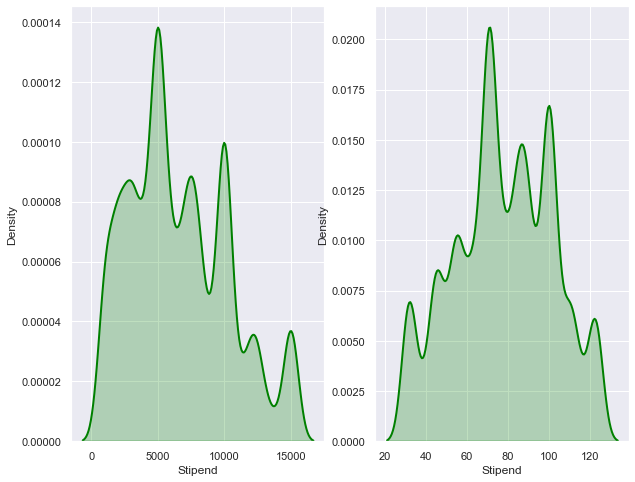

In [238]:
# we perform square root transformation and check for skewness
fig, ax = plt.subplots(1, 2)
sns.distplot(df["Stipend"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])
  
sns.distplot(np.sqrt(df["Stipend"]), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])
  
print("Skewness Before Transformation = ", round(df.Stipend.skew(), 2), "\nSkewness After Transformation = ", round(np.sqrt(df["Stipend"]).skew(), 2))
plt.show()

In [239]:
# we store all the transformations for further evaluation later
df["Stipend_log"] = np.log(df["Stipend"])
df["Stipend_sqrt"] = np.sqrt(df["Stipend"])
df["Stipend_boxcox"] = boxcox(df["Stipend"], lmda)

### **Creation of Dummy Variables**

##### Feature Selection

Going forward from here, we will only be using the features that will be relevant for the end user of our app to get stipend predictions. This will also help us make a more generalized model.
The features that we will be taking into consideration are:
* Duration
* Location
* Title
* Skills (The user has)
* Perks (The user wants)

We use the MultiLabelBinarizer from sklearn to create dummy variables of all skills and perks for each observation.
Then after creating dummies for all other relevant categorical features such as Title and Location, we will concatenate everything together in one DataFrame.

In [240]:
# we create dummies dataframe for each specific skill in "Skills Required" and store it
from sklearn.preprocessing import MultiLabelBinarizer

sklist = list(df["Skills Required"])
dfsk = pd.DataFrame({'groups': sklist}, columns=['groups'])
s = dfsk['groups']
mlb = MultiLabelBinarizer()
y = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)
y.sample(3)

,.NET,3ds Max,AJAX,ANSYS,ARM Microcontroller,ASP.NET,Ableton Live,Accounting,Acting Audition,Acting technique,...,Wireframing,WordPress,XML,Xamarin,Xcode,Yii,ZBrush,iOS,jQuery,web3.js
12488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
# we create dummies dataframe for each specific perk in "Perks" and store it to concat later

prklist = list(df["Perks"])
dfprk = pd.DataFrame({'groups': prklist}, columns=['groups'])
p = dfprk['groups']
mlbp = MultiLabelBinarizer()
z = pd.DataFrame(mlbp.fit_transform(p),columns=mlbp.classes_, index=df.index)
z.sample(3)

,5 days a week,Certificate,Flexible work hours,Free snacks & beverages,Informal dress code,Job offer,Letter of recommendation,NA
4321,0,0,1,1,1,0,1,0
7880,1,0,1,0,0,0,0,0
2681,0,1,1,0,0,0,1,0


In [242]:
# we create dummies for Title and Location
dum = pd.get_dummies(df[["Title", "Location"]])

In [243]:
# we concatenate all our dummies
df1 = pd.concat([df, y, z, dum], axis=1)

We drop the features that are irrelevant for the model we will be building.

In [244]:
# we drop irrelevant features
df1.drop(["Title", "Location", "Company", "Skills Required", "Perks", "Applicants", "Number of Openings"], axis=1, inplace=True)

### **Pre-Modelling Tests**

##### One-Way ANOVA

We perform One-Way ANOVA test on all features with our Target Variable to check for all individual statistical significances.

In [245]:
# we run ANOVA test on all features to get summary to test for significance with our target variable
cols = list(df1.columns)
anova_df1 = pd.DataFrame(columns=["Stat", "+/-", "Effect Size", "p-value"])

for col in df1[cols]:
        if not col == "Stipend":
            if not col == "Stipend_log":
                if not col == "Stipend_sqrt":
                    if not col == "Stipend_boxcox":
                        F, p = func.anova(df1[[col, "Stipend_boxcox"]], col, "Stipend_boxcox")
                        anova_df1.loc[col] = ["F", "", round(F, 3), round(p, 6)]
           
anova_df1.sort_values(["Effect Size"], ascending=False)

,Stat,+/-,Effect Size,p-value
Location_Work From Home,F,,1430.916,0.000000
Flexible work hours,F,,697.765,0.000000
Incentives,F,,620.447,0.000000
Informal dress code,F,,385.778,0.000000
Job offer,F,,355.546,0.000000
...,...,...,...,...
Title_Advance Excel Management,F,,0.000,0.994685
Title_Content Creation/Development (Stock Market),F,,0.000,0.994685
Title_Presentation Hosting,F,,0.000,0.994685
Title_Vedic Maths Online Tutoring,F,,0.000,0.994685


Although, we see there are many statistically insignificant features, we don’t decide to drop them for now as we can adjust for it by reducing the complexity during our model building process with regularization.

##### Correlation

We calculate and check the Correlation Coefficients for all features with our target variable with their respective p-values.

In [246]:
# we check all correlation coefficients and significance with our target variable
from scipy import stats
corr_df = pd.DataFrame(columns=["r", "p"])

for col in df1:
    if col != "Stipend":
        if col != "Stipend_log":
            if col != "Stipend_sqrt":
                if col != "Stipend_boxcox":
                    r, p = stats.pearsonr(df1.Stipend, df1[col])
                    corr_df.loc[col] = [round(r, 3), round(p, 6)]
        
corr_df

,r,p
Duration,0.228,0.000000
Incentives,-0.189,0.000000
.NET,0.015,0.086509
3ds Max,-0.001,0.884058
AJAX,0.000,0.957799
...,...,...
Location_Virar,0.033,0.000130
Location_Visakhapatnam,-0.001,0.896147
Location_Warangal,0.014,0.098932
Location_Work From Home,-0.279,0.000000


##### Variance Inflation Factor (VIF)

We skip performing Variance Inflation Factor (VIF) test in this case as there is no suspicion of multicollinearity in our model.

### **Model Building**

##### Selection of Model

For our Dataset, we decide to use Light Gradient Boosting Machine (LGBM) Regressor. 
The reason being is that our Dataset is quite large (Around 14,000 observations with high number of features) and Light GBM is very good at handling large size of data (above 10,000) while also staying efficient as it takes lower memory to run. It also performs better on Datasets with higher complexity as it provides options for regularization and can also be further hyper-parameter tuned to improve the balance between bias and variance.

In [249]:
# we import the libraries necessary for creating our ML model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

In [250]:
# we prepare our input and target sets
X = df1.drop(columns=["Stipend", "Stipend_log", "Stipend_sqrt", "Stipend_boxcox"])
y, yl, ys, yb = df1["Stipend"], df1["Stipend_log"], df1["Stipend_sqrt"], df1["Stipend_boxcox"]

In [251]:
# we scale our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Selection of Transformed Variable

For the selection of best transformed variable for our model, we fit the dataset with all different transformed target variables and also the non-transformed target variable on the vanilla LGBM model and evaluate the scores.

In [252]:
# we divide all our transformed datasets into train test splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=45)
X1_train, X1_test, yl_train, yl_test = train_test_split(X_scaled, yl, test_size=0.2, random_state=45)
X2_train, X2_test, ys_train, ys_test = train_test_split(X_scaled, ys, test_size=0.2, random_state=45)
X3_train, X3_test, yb_train, yb_test = train_test_split(X_scaled, yb, test_size=0.2, random_state=45)

In [253]:
# we fit the non transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
print("Train Set R squared value =", lgbm_model.score(X_train, y_train)), print("Test Set R squared value =", lgbm_model.score(X_test, y_test))
print("Train Set MAE =",mean_absolute_error(y_train, lgbm_model.predict(X_train)))
print("Test Set MAE =",mean_absolute_error(y_test, lgbm_model.predict(X_test)))

Train Set R squared value = 0.35582392200977897
Test Set R squared value = 0.2546677556093666
Train Set MAE = 2402.0537086987715
Test Set MAE = 2586.777272762604


In [254]:
# we fit the log transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X1_train, yl_train)
print("Train Set R squared value =", lgbm_model.score(X1_train, yl_train)), print("Test Set R squared value =", lgbm_model.score(X1_test, yl_test))
print("Train Set MAE =",mean_absolute_error(np.exp(yl_train), np.exp(lgbm_model.predict(X1_train))))
print("Test Set MAE =",mean_absolute_error(np.exp(yl_test), np.exp(lgbm_model.predict(X1_test))))

Train Set R squared value = 0.3912020653424265
Test Set R squared value = 0.2888534715066896
Train Set MAE = 2406.72499347574
Test Set MAE = 2591.680254823495


In [255]:
# we fit the square root transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X2_train, ys_train)
print("Train Set R squared value =",lgbm_model.score(X2_train, ys_train)), print("Test Set R squared value =",lgbm_model.score(X2_test, ys_test))
print("Train Set MAE =",mean_absolute_error(np.square(ys_train), np.square(lgbm_model.predict(X2_train))))
print("Test Set MAE =",mean_absolute_error(np.square(ys_test), np.square(lgbm_model.predict(X2_test))))

Train Set R squared value = 0.3774721202495943
Test Set R squared value = 0.2783073178863845
Train Set MAE = 2374.3431436735336
Test Set MAE = 2564.420383166986


In [256]:
# we fit the boxcox transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X3_train, yb_train)
print("Train Set R squared value =",lgbm_model.score(X3_train, yb_train)), print("Test Set R squared value =",lgbm_model.score(X3_test, yb_test))
print("Train Set MAE =",mean_absolute_error(inv_boxcox(yb_train, lmda), inv_boxcox(lgbm_model.predict(X3_train), lmda)))
print("Test Set MAE =",mean_absolute_error(inv_boxcox(yb_test, lmda), inv_boxcox(lgbm_model.predict(X3_test), lmda)))

Train Set R squared value = 0.3771769741068348
Test Set R squared value = 0.27696565589177113
Train Set MAE = 2375.1705943758348
Test Set MAE = 2566.6044316808243


We see that both Square Root Transformation and Box-Cox Transformation gave the best scores and hence we decide to go with either one of them (Box-Cox in this case).

### **Hyper-Parameter tuning of the Model**

##### Regularization

Our primary objective of Hyper-parameter tuning in our case is to reduce the complexity of our model. This is because we have a large number of features (2492) in our model which makes our model very complex and causes overfitting. 
For this purpose, we use the “reg_lambda” hyper-parameter in our LGBM model to provide L2 Regularization. We use L2 Regularization because it disperses the error terms in all the weights which can lead to more accurate final model that can generalize better.
To find the ideal value of Lambda of L2 Regularization, we run a For-Loop to plot the difference between the Mean Absolute Error of the training set and the test set.

In [257]:
# we run a For-loop to find the ideal value of lambda for our L2 Regularization
testlist = []
count = []
reg_lam = []
for i in range(0, 10000, 25):
    lgbm_model = LGBMRegressor(reg_lambda=i)
    lgbm_model.fit(X3_train, yb_train)
    train_mae = mean_absolute_error(inv_boxcox(yb_train, lmda), inv_boxcox(lgbm_model.predict(X3_train), lmda))
    test_mae = mean_absolute_error(inv_boxcox(yb_test, lmda), inv_boxcox(lgbm_model.predict(X3_test), lmda))
    testlist.append(np.round(test_mae-train_mae, 2))
    count.append(len(testlist))
    reg_lam.append(i)
lam_dict = dict(zip(count, reg_lam))

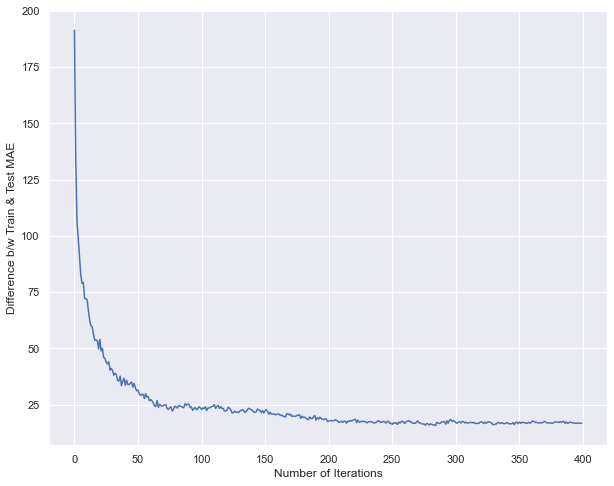

In [258]:
# we plot the result of our For-Loop
plt.plot(testlist)
plt.xlabel("Number of Iterations")
plt.ylabel("Difference b/w Train & Test MAE");

With visual interpretation, we can see that the difference between the MAE of the training set and the test set gets minimal from around 70 iterations so we decide to take the lambda value from that point.

In [259]:
# we find the ideal lambda value
print("The ideal lambda value is:", reg_lam[70])

The ideal lambda value is: 1750


##### Randomized Search CV

We perform a randomized search with the objective to find the best hyper-parameters for our model. 
We set our scoring method to Mean Absolute Error to find the best hyper-parameters on. We decide to choose MAE for evaluation because it is relatively easy to interpret and outliers are not particularly bad in for this type of model.

In [260]:
# we define a function to evaluate our model on MAE score
def evaluate_mae(model, X, y, type):
    if type == "boxcox":
        scores = mean_absolute_error(inv_boxcox(y, lmda), inv_boxcox(model.predict(X), lmda))
        return scores

In [261]:
# we do randomized search cv to find best hyper-parameters

parameters= {
    "num_leaves": [15, 25, 35, 45, 55, 65, 75], # provided smaller num_leaves to adjust for overfitting 
    "max_depth": [-1, 0, 2, 3, 4, 5, 8, 10, 15, 20], # provided max_depth to adjust for overfitting
    "learning_rate": [0.005, 0.01, 0.05, 0.75, 0.1, 0.15, 0.2], # provided wide range for learning_rate to experiment combinations with wide range of num_iterations
    "max_bin": [35, 45, 55, 65, 75, 90], # provided smaller max_bin to deal with overfitting and also for faster speed
    "num_iterations": [50, 100, 150, 200, 350, 500, 750, 1000, 1500] # vice versa as learning rate
    #"path_smooth": [5, 10, 15, 20, 25, 30], # we dont use path smooth here as we are already providing L2 Regularization
}

randomcv = RandomizedSearchCV(estimator=LGBMRegressor(reg_lambda=1750), param_distributions= parameters, scoring="neg_mean_absolute_error", verbose=False, n_iter=150, error_score="raise", cv=6)
randomcv.fit(X3_train, yb_train)
scores = evaluate_mae(randomcv.best_estimator_, X3_train, yb_train, "boxcox")
print(">>","Train Set MAE Score:", scores)
scores = evaluate_mae(randomcv.best_estimator_, X3_test, yb_test, "boxcox")
print(">>","Test Set MAE Score:", scores)

>> Train Set MAE Score: 2510.119032999445
>> Test Set MAE Score: 2570.710477817413


After completion of Randomized Search CV, we find the following best hyper-parameters for our model:

In [262]:
# we check the best hyper-parameters
randomcv.best_params_

{'num_leaves': 75,
 'num_iterations': 750,
 'max_depth': 8,
 'max_bin': 35,
 'learning_rate': 0.1}

##### Feature Importance

We see that some of the most important features in our model are as follows:

In [263]:
# we check the importance of all our features
zip_data = list(zip(X.columns, lgbm_model.feature_importances_))
feature_imp_df = pd.DataFrame(zip_data, columns =['Feature', 'Importance'])
feature_imp_df.sort_values("Importance", ascending=False).head(15)

,Feature,Importance
0,Duration,203
1,Incentives,103
387,Job offer,80
2263,Location_Bangalore,72
310,SQL,62
201,JavaScript,61
384,Flexible work hours,59
239,Mathematics,54
3,3ds Max,54
2344,Location_Work From Home,51


##### Saving of the Model

We save all the relevant files in pickle format for further use while building our client facing API using Flask.

In [264]:
# we save the model, scaler and feature names dictionary for our flask api
import pickle
pickle.dump(randomcv.best_estimator_, open('flask-app\internshala_lgbm_model.pkl', 'wb'))
pickle.dump(scaler, open('flask-app\scaler.pkl','wb'))
index_dict = dict(zip(X.columns,range(X.shape[1])))
pickle.dump(index_dict, open('flask-app\index_dict.pkl', 'wb'))